In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cic_asymptotics.dgps import ExponentialDGP, GaussianDGP, LimitCaseDGP
from cic_asymptotics.empirical_cdf import smoothed_empirical_cdf
from cic_asymptotics.density_estimation import kernel_density_estimator_with_moving_bandwith, kernel_density_estimator, rectangular_kernel, gaussian_kernel, epanechnikov_kernel
from cic_asymptotics.estimators import compute_estimator, compute_standard_error_estimated_ranks, compute_theta_hat, compute_counterfactual_ranks, compute_double_integral

In [73]:
# PARAMETERS
N = 10_000
BINS = 100

# Exponential DGP

True value of theta: 0.1429


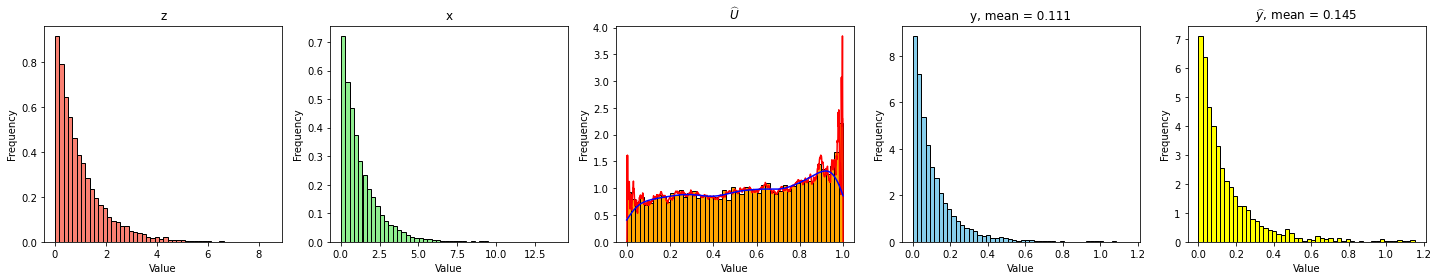

In [ ]:
dgp = ExponentialDGP(n=N)

y, z, x = dgp.generate()
print(f"True value of theta: {dgp.theta0:.4f}")

# Compute the empirical CDF of z
u_hat = smoothed_empirical_cdf(x, data=z)

# Compute rank density
x_ = np.linspace(1e-6, 1-1e-6, 1000)
f_hat = kernel_density_estimator_with_moving_bandwith(x_, u_hat)
f_hat_2 = kernel_density_estimator(x_, u_hat)

# Compute counterfactual y
theta_hat, counterfactual_y = compute_theta_hat(u_hat=u_hat, y=y)


# Create subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms
ax[0].hist(z, bins=BINS, color='salmon', edgecolor='black', density=True)
ax[0].set_title('z')

ax[1].hist(x, bins=BINS, color='lightgreen', edgecolor='black', density=True)
ax[1].set_title('x')

ax[2].hist(u_hat, bins=BINS, color='orange', edgecolor='black', density=True)
ax[2].plot(x_, f_hat, color='red')
ax[2].plot(x_, f_hat_2, color='blue')
ax[2].set_title(r'$\widehat U$ (and density estimates)')

ax[3].hist(y, bins=BINS, color='skyblue', edgecolor='black', density=True)
ax[3].set_title(f'y, mean = {y.mean():.3f}')

ax[4].hist(counterfactual_y, bins=BINS, color='yellow', edgecolor='black', density=True)
ax[4].set_title(r'$\widehat y$, mean = {:.3f}'.format(counterfactual_y.mean()))


# Common labels
for i in ax:
    i.set_xlabel('Value')
    i.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [4]:
theta_hat, standard_error = compute_standard_error_estimated_ranks(
    y=y,
    x=x,
    z=z,
    cdf_method="smoothed",
    se_method="xavier"
)
print(f"Estimated theta: {theta_hat:.4f}")
print(f"Standard error: {standard_error:.4f}")

Estimated theta: 0.1447
Standard error: 0.0270


# Gaussian DGP

True value of theta: 1.0000


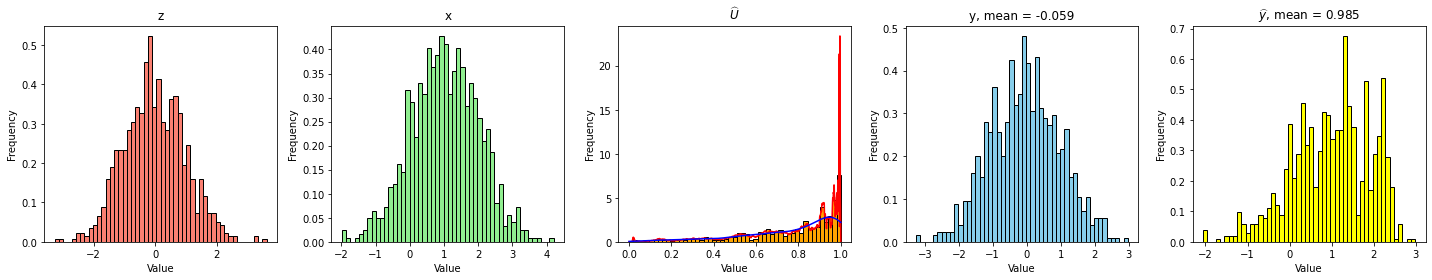

In [ ]:
dgp = GaussianDGP(n=N)

y, z, x = dgp.generate()
print(f"True value of theta: {dgp.theta0:.4f}")

# Compute the empirical CDF of z
u_hat = smoothed_empirical_cdf(x, data=z)

# Compute rank density
x_ = np.linspace(1e-6, 1-1e-6, 1000)
f_hat = kernel_density_estimator_with_moving_bandwith(x_, u_hat)
f_hat_2 = kernel_density_estimator(x_, u_hat)

# Compute counterfactual y
theta_hat, counterfactual_y = compute_theta_hat(u_hat=u_hat, y=y)


BINS = 50

# Create subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms
ax[0].hist(z, bins=BINS, color='salmon', edgecolor='black', density=True)
ax[0].set_title('z')

ax[1].hist(x, bins=BINS, color='lightgreen', edgecolor='black', density=True)
ax[1].set_title('x')

ax[2].hist(u_hat, bins=BINS, color='orange', edgecolor='black', density=True)
ax[2].plot(x_, f_hat, color='red')
ax[2].plot(x_, f_hat_2, color='blue')
ax[2].set_title(r'$\widehat U$')

ax[3].hist(y, bins=BINS, color='skyblue', edgecolor='black', density=True)
ax[3].set_title(f'y, mean = {y.mean():.3f}')

ax[4].hist(counterfactual_y, bins=BINS, color='yellow', edgecolor='black', density=True)
ax[4].set_title(r'$\widehat y$, mean = {:.3f}'.format(counterfactual_y.mean()))


# Common labels
for i in ax:
    i.set_xlabel('Value')
    i.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Limit case DGP

True value of theta: 0.1041


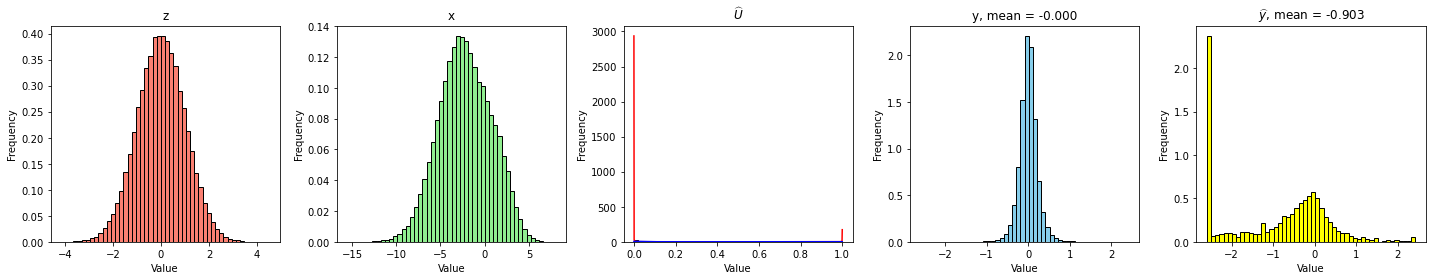

In [ ]:
dgp = LimitCaseDGP(n=N, b1 = 0.1, b2=0.3, d1=0.1, d2=0.1)

y, z, x = dgp.generate()
print(f"True value of theta: {dgp.theta0:.4f}")

# Compute the empirical CDF of z
u_hat = smoothed_empirical_cdf(x, data=z)

# Compute rank density
x_ = np.linspace(1e-6, 1-1e-6, 1000)
f_hat = kernel_density_estimator_with_moving_bandwith(x_, u_hat)
f_hat_2 = kernel_density_estimator(x_, u_hat)

# Compute counterfactual y
theta_hat, counterfactual_y = compute_theta_hat(u_hat=u_hat, y=y)


BINS = 50

# Create subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms
ax[0].hist(z, bins=BINS, color='salmon', edgecolor='black', density=True)
ax[0].set_title('z')

ax[1].hist(x, bins=BINS, color='lightgreen', edgecolor='black', density=True)
ax[1].set_title('x')

ax[2].hist(u_hat, bins=BINS, color='orange', edgecolor='black', density=True)
ax[2].plot(x_, f_hat, color='red')
ax[2].plot(x_, f_hat_2, color='blue')
ax[2].set_title(r'$\widehat U$')

ax[3].hist(y, bins=BINS, color='skyblue', edgecolor='black', density=True)
ax[3].set_title(f'y, mean = {y.mean():.3f}')

ax[4].hist(counterfactual_y, bins=BINS, color='yellow', edgecolor='black', density=True)
ax[4].set_title(r'$\widehat y$, mean = {:.3f}'.format(counterfactual_y.mean()))


# Common labels
for i in ax:
    i.set_xlabel('Value')
    i.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

